# <center>Predicting admission from important parameters

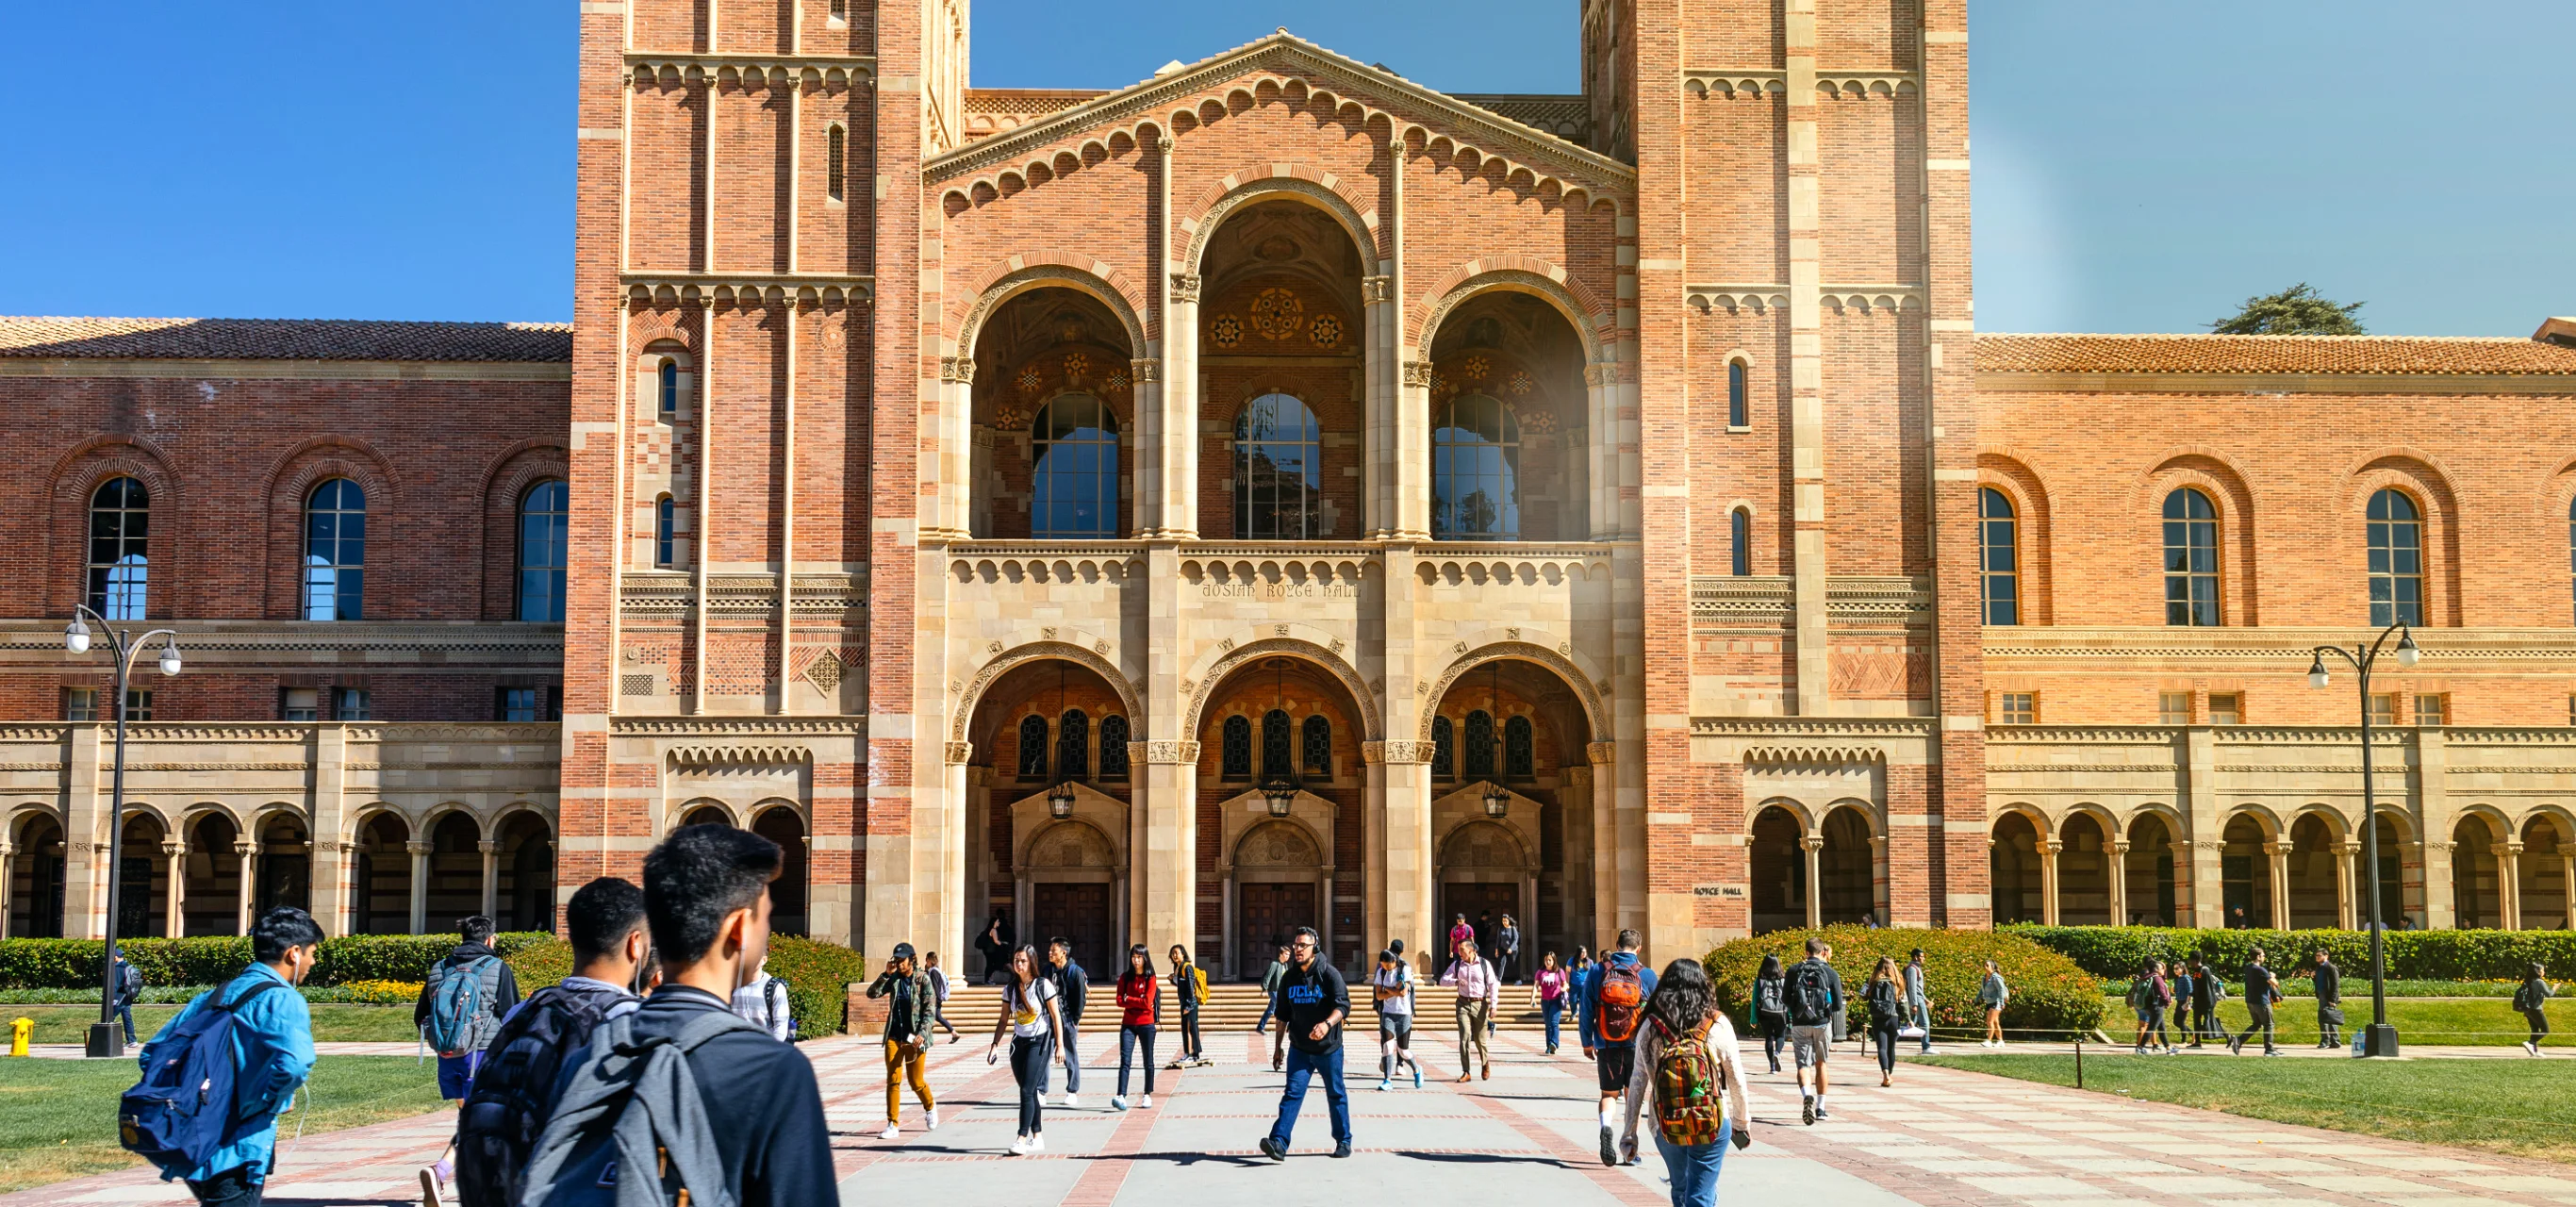

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.shape

(500, 9)

In [4]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

**Using data dictionary from source**

**Data has 500 rows and 9 columns**

In [5]:
df.isna().sum().sum()

0

**No null in the data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


The parameters included are :

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

**Datatypes are mostly also correct**

- We can rename CGPA to GPA, in reference to data dictionary
- Even though Research experience is int, but it is actually a categorical columns wich shows yes/no for the presence of research experience.

In [7]:
df.describe().T

count       mean         std     min       25%     50%  \
Serial No.         500.0  250.50000  144.481833    1.00  125.7500  250.50   
GRE Score          500.0  316.47200   11.295148  290.00  308.0000  317.00   
TOEFL Score        500.0  107.19200    6.081868   92.00  103.0000  107.00   
University Rating  500.0    3.11400    1.143512    1.00    2.0000    3.00   
SOP                500.0    3.37400    0.991004    1.00    2.5000    3.50   
LOR                500.0    3.48400    0.925450    1.00    3.0000    3.50   
CGPA               500.0    8.57644    0.604813    6.80    8.1275    8.56   
Research           500.0    0.56000    0.496884    0.00    0.0000    1.00   
Chance of Admit    500.0    0.72174    0.141140    0.34    0.6300    0.72   

                      75%     max  
Serial No.         375.25  500.00  
GRE Score          325.00  340.00  
TOEFL Score        112.00  120.00  
University Rating    4.00    5.00  
SOP                  4.00    5.00  
LOR                  4.00    5.00  
CGPA                 9.04    9.92  
Research             1.00    1.00  
Chance of Admit      0.82    0.97

**Mean and median seems to be very near to each other , strongly suggesting a normal distribution**

**Renaming CGPA to GPA and some column have whitespaces in their name**

In [8]:
df=df.rename(columns={'CGPA':'GPA','LOR ':'LOR','Chance of Admit ':'Chance of Admit'})

In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'GPA', 'Research', 'Chance of Admit'],
      dtype='object')

**We can drop Serial number as that is nothing but the index we are working on, and also not helpful in modelling**

In [10]:
df=df.drop('Serial No.',axis=1)
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'GPA',
       'Research', 'Chance of Admit'],
      dtype='object')

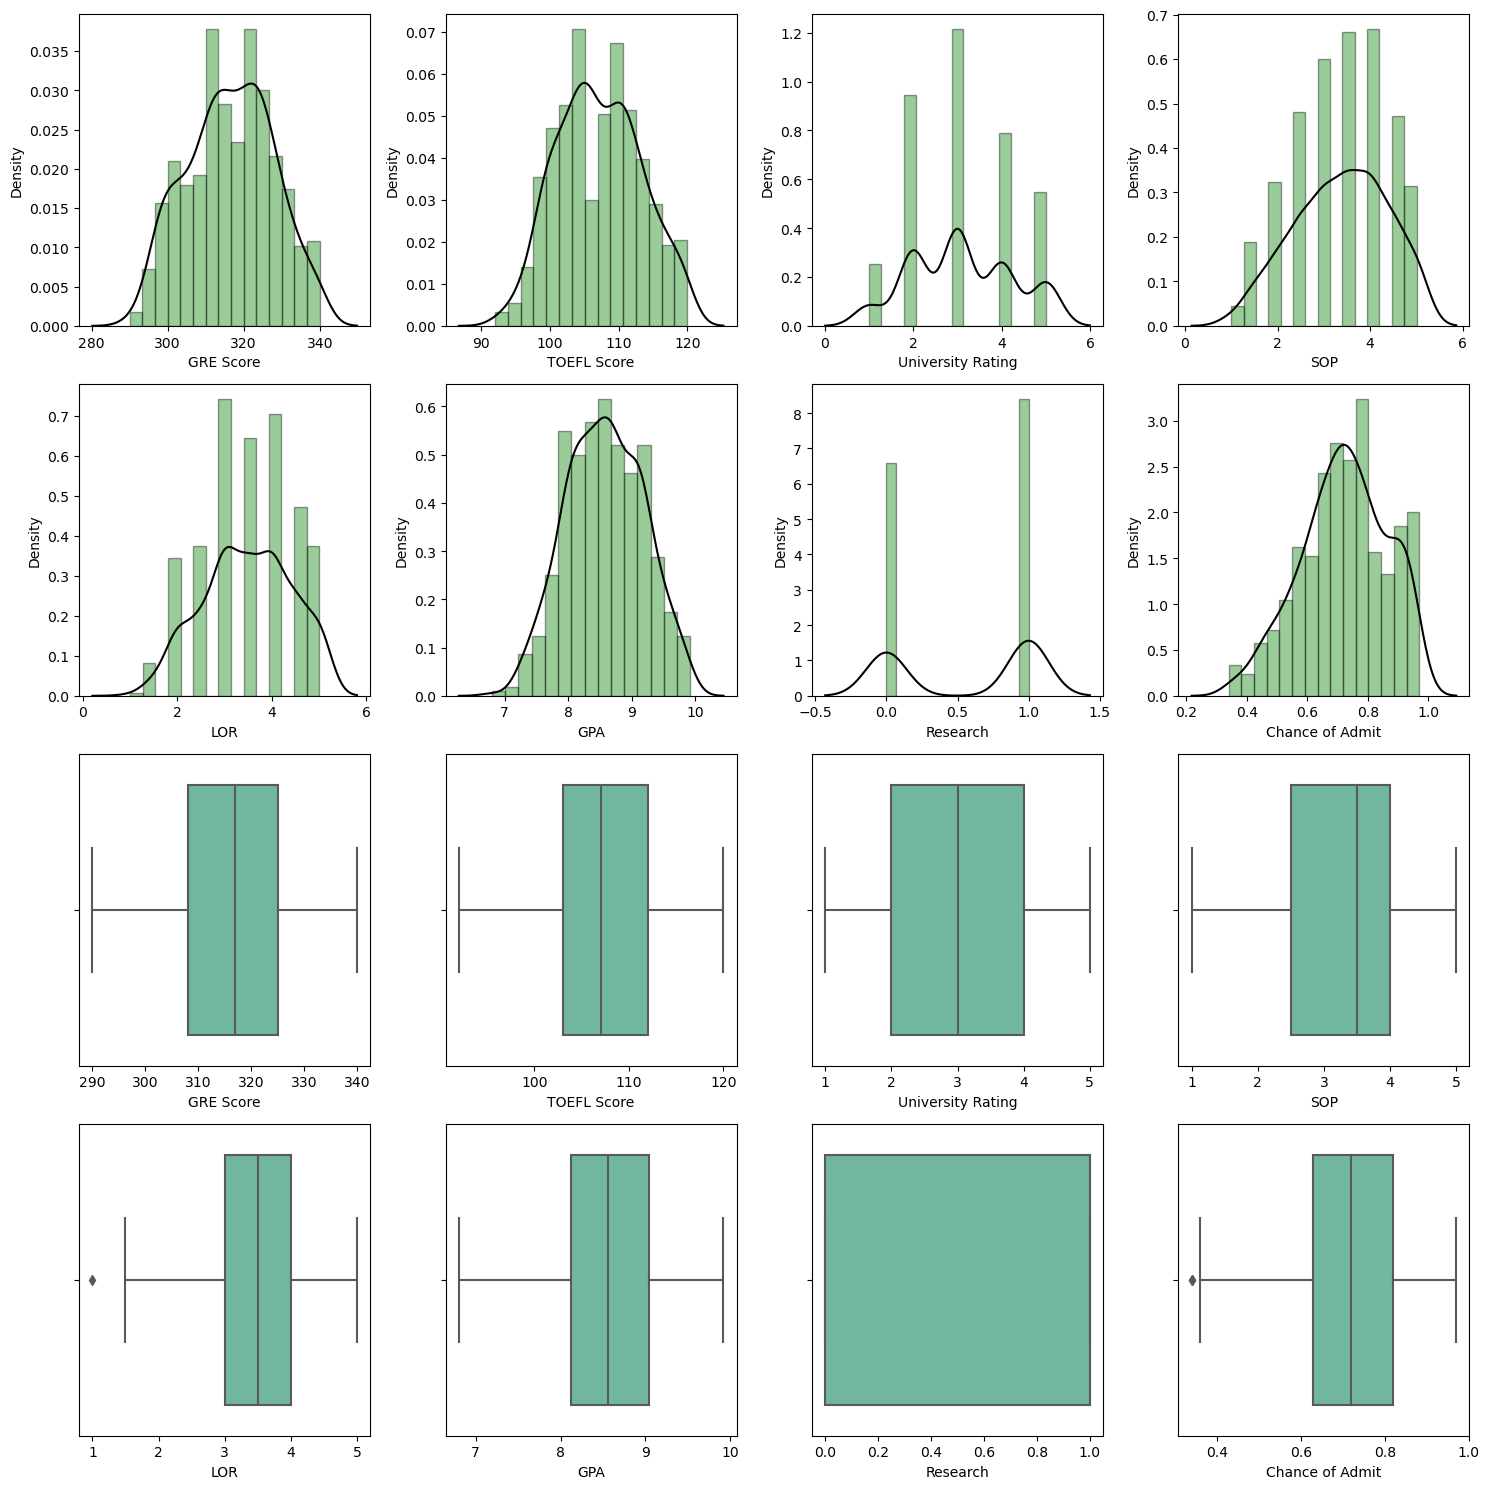

In [11]:
plt.figure(figsize=(15,15))

for i in range(len(df.columns)):
    plt.subplot(4,4,i+1)
    sns.distplot(df.iloc[:,i],hist_kws={'color':'g','edgecolor':'black'},kde_kws={'color':'k'},bins=15)


for i in range(len(df.columns)):
    plt.subplot(4,4,i+9)
    sns.boxplot(df.iloc[:,i],orient='v',palette='BuGn')
plt.tight_layout()

**Though we can see there is a single oulier in LOR and a single in Chance of admit but for safety we can define a function that will remove outliers from the whole data feature by feature**

In [13]:
print("Before outlier_remover, df had {0} rows".format(df.shape[0]))

Before outlier_remover, df had 500 rows


In [14]:
def outlier_remover(data):
    for i in data.columns:
        quartile1=data[i].quantile(0.25)
        quartile3=data[i].quantile(0.75)

        iqr=quartile3-quartile1
        lower_fence=quartile1 - 1.5*iqr
        upper_fence=quartile3 + 1.5*iqr

        data=data[data[i]>=lower_fence]
        data=data[data[i]<=upper_fence]
    return data

In [15]:
df=outlier_remover(df)  # outlier_Remover worked on input and gave the cleaned output in that input only and not updated the 
                        #original dataframe itself, so weassigned it to original ddataframe

In [16]:
print("After outlier_remover df had {0} rows".format(df.shape[0]))

After outlier_remover df had 497 rows


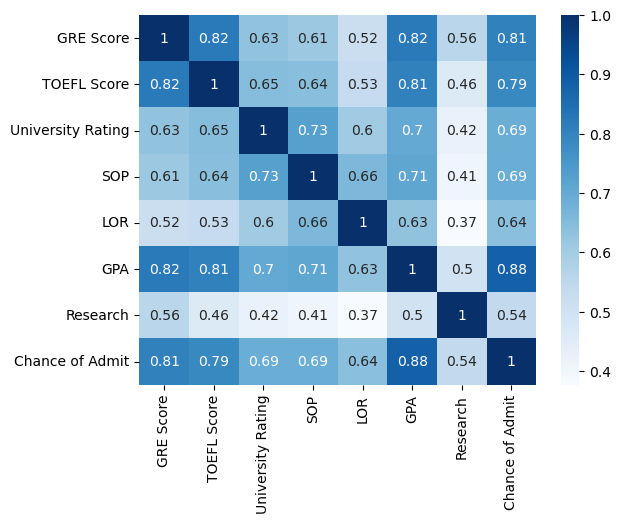

In [17]:
sns.heatmap(data=df.corr(),annot=True,cmap='Blues',robust=True);

- Even though some of the features are highly correlated but as said "Correlation doesn't neccesarily mean causation" so i am assuming them to be independent as they feels like it from the intuition.

**Now our data is cleaned and we can now starting our modelling process**

**Segregating our dataset in input and ouput features**

In [18]:
X=df[df.columns[df.columns!='Chance of Admit']]
X.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   GPA  Research
0        337          118                  4  4.5  4.5  9.65         1
1        324          107                  4  4.0  4.5  8.87         1
2        316          104                  3  3.0  3.5  8.00         1
3        322          110                  3  3.5  2.5  8.67         1
4        314          103                  2  2.0  3.0  8.21         0

In [19]:
y=df[df.columns[df.columns=='Chance of Admit']]
y.head()

Chance of Admit
0             0.92
1             0.76
2             0.72
3             0.80
4             0.65

**Splitting the data**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((372, 7), (125, 7), (372, 1), (125, 1))

**Standardization of trainig dataset**

**SInce we that data is normally distributed , we should use standard scaler**

**But we cant scale Reasearch columns as it is not a numerical feature, it is a categorical feature**

**Thus spilliting categorical and numerical data**

In [21]:
X_train_num_f=X_train[X_train.columns[X_train.columns!='Research']]
X_train_cat_f=X_train[X_train.columns[X_train.columns=='Research']]
X_test_num_f=X_test[X_test.columns[X_test.columns!='Research']]
X_test_cat_f=X_test[X_test.columns[X_test.columns=='Research']]

**Standardizing the numerical features of the data**

In [22]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()

X_train_std_num=std.fit_transform(X_train_num_f)
X_train_std_num=pd.DataFrame(X_train_std_num,columns=X_train_num_f.columns)
X_test_std_num=std.transform(X_test_num_f)
X_test_std_num=pd.DataFrame(X_test_std_num,columns=X_test_num_f.columns)

In [23]:
print(X_train_std_num.shape)
print(X_test_std_num.shape)
print(X_train_cat_f.shape)
print(X_test_cat_f.shape)

(372, 6)
(125, 6)
(372, 1)
(125, 1)


In [24]:
X_train_cat_f=X_train_cat_f.reset_index(drop=True)
X_train_cat_f.shape

(372, 1)

In [25]:
X_test_cat_f=X_test_cat_f.reset_index(drop=True)
X_test_cat_f.shape

(125, 1)

**Now that we have done our scaling on numerical columns, we want to feature engineer our categorical column by creating dummies.But as we can see that Research is already in binary form , so we dont need to create dummies.** 

**Now we need to merge numerical and categorical features back in one data frame**

In [26]:
X_train=pd.merge(left=X_train_std_num,right=X_train_cat_f,left_index=True,right_index=True)
X_test=pd.merge(left=X_test_std_num,right=X_test_cat_f,left_index=True,right_index=True)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((372, 7), (125, 7), (372, 1), (125, 1))

**A good way to find import features is RFE is since the total number of features we are having is 7 only, so there is no point in using RFE as there wont be a case of overfitting in using all 7 features**

In [28]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression(n_jobs=-1)
lr=lr.fit(X_train, y_train)

In [29]:
pred_train=lr.predict(X_train)
pred_test=lr.predict(X_test)

In [30]:
from sklearn.metrics import r2_score

In [31]:
print(r2_score(pred_train,y_train))
print(r2_score(pred_test,y_test))

0.7976573886155589
0.7326498821339698


In [32]:
print('The Coeffecient of the MLR model is ',lr.coef_)

print('\n The Intercept of the MLR model is',lr.intercept_)

The Coeffecient of the MLR model is  [[0.02336825 0.01668892 0.00616773 0.00046471 0.01910618 0.06732239
  0.02397849]]

 The Intercept of the MLR model is [0.70763066]
